# U.S. Medical Insurance Costs - Portfolio Project

## Necessary imports:

In [25]:
import csv 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

**This project is based on U.S. Medical Insurance Costs dataset, saved as insurance.csv file** <br>
Dataset has 7 columns:
- age
- sex
- bmi 
- children (number of children)
- smoker (is the person smoking)  
- region (region of US)
- charges (Individual medical costs billed by health insurance)

In [3]:
with open('insurance.csv') as insurance_csv:
    header = insurance_csv.readline().split(',')
    first_row = insurance_csv.readline().split(',')
    
print("Example data:")
for i in range(len(header)):
    print(header[i], first_row[i], sep=" - ")

Example data:
age - 19
sex - female
bmi - 27.9
children - 0
smoker - yes
region - southwest
charges
 - 16884.924



## Creating dict of dataset

In [4]:
insurace_dict = {
    'age': [],
    'sex':  [],
    'bmi': [],
    'children': [],
    'smoker': [],
    'region': [], 
    'charges': []
    
}
with open('insurance.csv') as insurance_csv:
    insurance_reader = csv.DictReader(insurance_csv, delimiter=',')
    
    for row in insurance_reader:
        insurace_dict['age'].append(int(row['age']))
        insurace_dict['sex'].append(row['sex'])
        insurace_dict['bmi'].append(float(row['bmi']))
        insurace_dict['children'].append(int(row['children']))
        insurace_dict['smoker'].append(row['smoker'])
        insurace_dict['region'].append(row['region'])
        insurace_dict['charges'].append(float(row['charges']))

        
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## The insured's average age


In [5]:
total_age = 0 

for age in insurace_dict['age']:
    total_age += age

average_age = total_age / len(insurace_dict['age'])

print("Average age is " + str(average_age) + " ~= " + str(round(average_age)) + " years.")

Average age is 39.20702541106129 ~= 39 years.


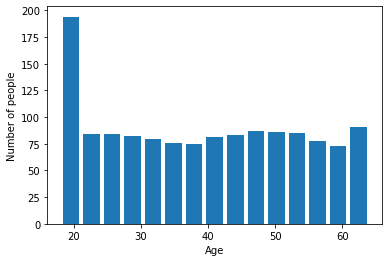

In [6]:
plt.hist(insurace_dict['age'], bins=15, rwidth=0.8, label='ages')
plt.xlabel('Age',)
plt.ylabel('Number of people')
plt.show()

Most of insurance people is before 20 years old.

## Smoker and non-smoker


In [28]:
# smoker male
smoker_male = df[(df.smoker == 'yes') &
                (df.sex == 'male')]

smoker_male.reset_index(drop=True, inplace=True)

num_smoker_male = len(smoker_male)

# non-smoker male
non_smoker_male = df[(df.smoker == 'no') &
                (df.sex == 'male')]
non_smoker_male.reset_index(drop=True, inplace=True)

num_non_smoker_male = len(non_smoker_male)

# smoker female 
smoker_female = df[(df.smoker == 'yes') &
                (df.sex == 'female')]

smoker_female.reset_index(drop=True, inplace=True)

num_smoker_female = len(smoker_female)

# non smoker female
non_smoker_female = df[(df.smoker == 'no') &
                (df.sex == 'female')]
non_smoker_female.reset_index(drop=True, inplace=True)

num_non_smoker_female = len(non_smoker_female)



print("Number of male smokers:", num_smoker_male)
print("Number of male non-smokers:", num_non_smoker_male)

print("Number of female smokers:", num_smoker_female)
print("Number of female non-smokers:", num_non_smoker_female)

percentage_male_smokers = num_smoker_male / num_non_smoker_male * 100
percentage_female_smokers = num_smoker_female / num_non_smoker_female * 100

print("Percentage of male smokers:", round(percentage_male_smokers, 2), '%')
print("Percentage of female smokers:", round(percentage_female_smokers, 2), '%')


Number of male smokers: 159
Number of male non-smokers: 517
Number of female smokers: 115
Number of female non-smokers: 547
Percentage of male smokers: 30.75 %
Percentage of female smokers: 21.02 %
